In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
shopping_data = pd.read_csv('shopping_trends_updated.csv')

In [ ]:
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

**1.What is the overall distribution of customer ages in the dataset?**

In [ ]:
age_distribution = shopping_data['Age'].describe()

In [ ]:
age_distribution

,Age
count,3900.000000
mean,44.068462
std,15.207589
min,18.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,70.000000


**2.How does the average purchase amount vary across different product categories?**

In [ ]:
avg_purchase_by_category = shopping_data.groupby('Category')['Purchase Amount (USD)'].mean()

In [ ]:
avg_purchase_by_category

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


**3.Which gender has the highest number of purchases?**

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

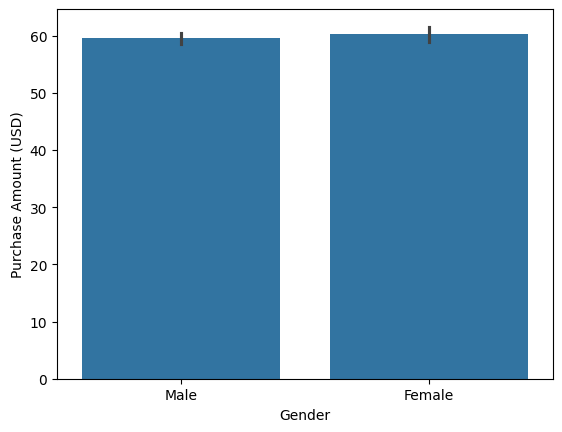

In [ ]:
sns.barplot(shopping_data, x = 'Gender' , y = 'Purchase Amount (USD)')

**4.What are the most commonly purchased items in each category?**

In [ ]:
common_items_per_category = shopping_data.groupby('Category')['Item Purchased'].value_counts().groupby(level=0).head(1)

In [ ]:
common_items_per_category

,,count
Category,Item Purchased,
Accessories,Jewelry,171
Clothing,Blouse,171
Footwear,Sandals,160
Outerwear,Jacket,163


In [ ]:
fig = px.histogram(shopping_data , x = 'Item Purchased' , color = 'Category')
fig.show()

**5.Are there any specific seasons or months where customer spending is significantly higher?**

In [ ]:
fig = px.histogram(shopping_data , x = 'Season' , range_y= [200 , 1500] )

fig.show()

**6.What is the average rating given by customers for each product category?**

In [ ]:
avg_rating_per_category = shopping_data.groupby('Category')['Review Rating'].mean().reset_index()

In [ ]:
avg_rating_per_category

,Category,Review Rating
0,Accessories,3.768629
1,Clothing,3.723143
2,Footwear,3.790651
3,Outerwear,3.746914


In [ ]:
fig = px.bar(avg_rating_per_category,x= 'Category' , y = 'Review Rating' )
fig.show()

**7.Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?**

In [ ]:
avg_purchase_subscribed = shopping_data.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

In [ ]:
avg_purchase_subscribed

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

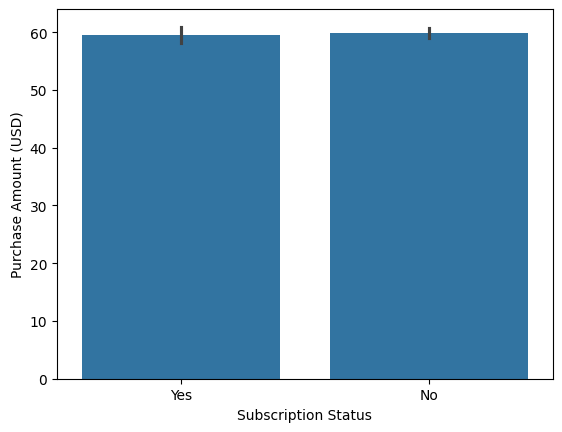

In [ ]:
sns.barplot(shopping_data, x = 'Subscription Status' , y = 'Purchase Amount (USD)')

**8.Which payment method is the most popular among customers?**

In [ ]:
shopping_data.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

,Purchase Amount (USD)
Payment Method,
Debit Card,60.915094
Credit Card,60.074516
Bank Transfer,59.712418
Cash,59.704478
PayPal,59.245199
Venmo,58.949527


<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

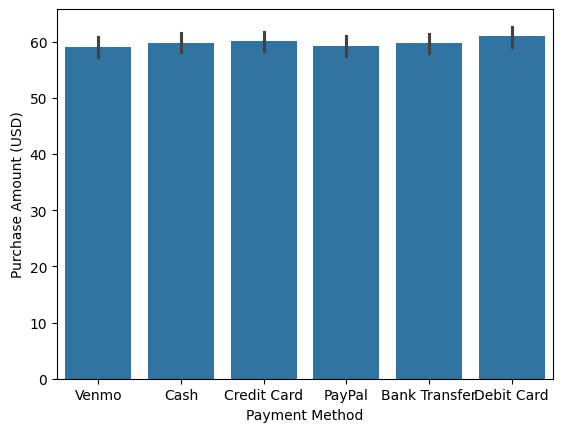

In [ ]:
sns.barplot(shopping_data,x='Payment Method' , y = 'Purchase Amount (USD)')

**9.Do customers who use promo codes tend to spend more than those who don't?**

In [ ]:
shop_groupby  = shopping_data.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
shop_groupby

,Promo Code Used,Purchase Amount (USD)
0,No,133670
1,Yes,99411


In [ ]:
fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()

**10.How does the frequency of purchases vary across different age groups?**

In [ ]:
freq_age_group = shopping_data.groupby(pd.cut(shopping_data['Age'], bins=[18, 30, 40, 50, 60, 70]))['Frequency of Purchases'].value_counts()

<ipython-input-43-4ab349701796>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
freq_age_group

Age       Frequency of Purchases
(18, 30]  Bi-Weekly                 148
          Quarterly                 134
          Every 3 Months            133
          Fortnightly               127
          Monthly                   116
          Annually                  114
          Weekly                    108
(30, 40]  Every 3 Months            121
          Annually                  118
          Monthly                   108
          Weekly                    105
          Fortnightly               103
          Quarterly                  88
          Bi-Weekly                  82
(40, 50]  Monthly                   117
          Every 3 Months            111
          Weekly                    110
          Bi-Weekly                 108
          Fortnightly               105
          Annually                  100
          Quarterly                  99
(50, 60]  Quarterly                 113
          Annually                  112
          Bi-Weekly                 109
          Every 3 Months            108
          Monthly                   107
          Fortnightly               102
          Weekly                    102
(60, 70]  Annually                  118
          Quarterly                 118
          Weekly                    105
          Every 3 Months             99
          Monthly                    98
          Fortnightly                95
          Bi-Weekly                  90
Name: count, dtype: int64

**11.Are there any correlations between the size of the product and the purchase amount?**

In [ ]:
shop_group = shopping_data.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
shop_group

,Size,Purchase Amount (USD)
0,L,61667
1,M,105167
2,S,40468
3,XL,25779


In [ ]:
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

**12.Which shipping type is preferred by customers for different product categories?**

In [ ]:
shipping_category_pref = shopping_data.groupby('Category')['Shipping Type'].value_counts().groupby(level=0).head(1)

In [ ]:
shipping_category_pref

,,count
Category,Shipping Type,
Accessories,Store Pickup,217
Clothing,Standard,297
Footwear,Free Shipping,122
Outerwear,Free Shipping,64


**13.How does the presence of a discount affect the purchase decision of customers?**

In [ ]:
shop_group = shopping_data.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [ ]:
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

**14.Are there any specific colors that are more popular among customers?**

In [ ]:
popular_colors = shopping_data['Color'].value_counts().head(5)

In [ ]:
popular_colors

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


**15.What is the average number of previous purchases made by customers?**

In [ ]:
avg_previous_purchases = shopping_data['Previous Purchases'].mean()

In [ ]:
avg_previous_purchases

25.35153846153846

**16.How does the purchase amount differ based on the review ratings given by customers?**

In [ ]:
purchase_rating_corr = shopping_data.groupby(pd.cut(shopping_data['Review Rating'], bins=[1, 2, 3, 4, 5]))['Purchase Amount (USD)'].mean()

<ipython-input-65-5e6f8ffb99e9>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
purchase_rating_corr

,Purchase Amount (USD)
Review Rating,
"(1, 2]",NaN
"(2, 3]",58.940968
"(3, 4]",59.292453
"(4, 5]",60.753930


**17.Are there any noticeable differences in purchase behavior between different locations?**

In [ ]:
location_purchase_avg = shopping_data.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).head(5)

In [ ]:
location_purchase_avg

,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310


In [ ]:
shop_group = shopping_data.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

In [ ]:
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

**18.Is there a relationship between customer age and the category of products they purchase?**

In [ ]:
age_category_corr = shopping_data.groupby('Category')['Age'].mean().reset_index()

In [ ]:
age_category_corr

,Category,Age
0,Accessories,44.224194
1,Clothing,43.782959
2,Footwear,44.442404
3,Outerwear,44.311728


In [ ]:
fig = px.bar(age_category_corr ,y = 'Age' , x= 'Category')
fig.show()

**19.How does the average purchase amount differ between male and female customers?**

In [ ]:
gender_purchase_avg = shopping_data.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()

In [ ]:
gender_purchase_avg

,Gender,Purchase Amount (USD)
0,Female,60.249199
1,Male,59.536199


In [ ]:
fig = px.bar(gender_purchase_avg, x = 'Gender' , y = 'Purchase Amount (USD)')
fig.show()